# Fish Data

# About Dataset

 This dataset is a record of 7 common different fish species in fish market sales.

import libraries

In [123]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling as pp

sns.set(style='whitegrid', font_scale=1.2, color_codes=True)

pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', -1)           
pd.options.display.max_columns = 50                 

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

sns.set_theme()
sns.set(rc={'figure.figsize':(12,8),'figure.dpi':100})

import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [124]:
fish = pd.read_csv('Fish_data.csv')

In [125]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Perform some EDA on dataset

In [126]:
fish.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

In [127]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [128]:
fish.shape

(159, 7)

In [129]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [130]:
fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'Correlation between features')

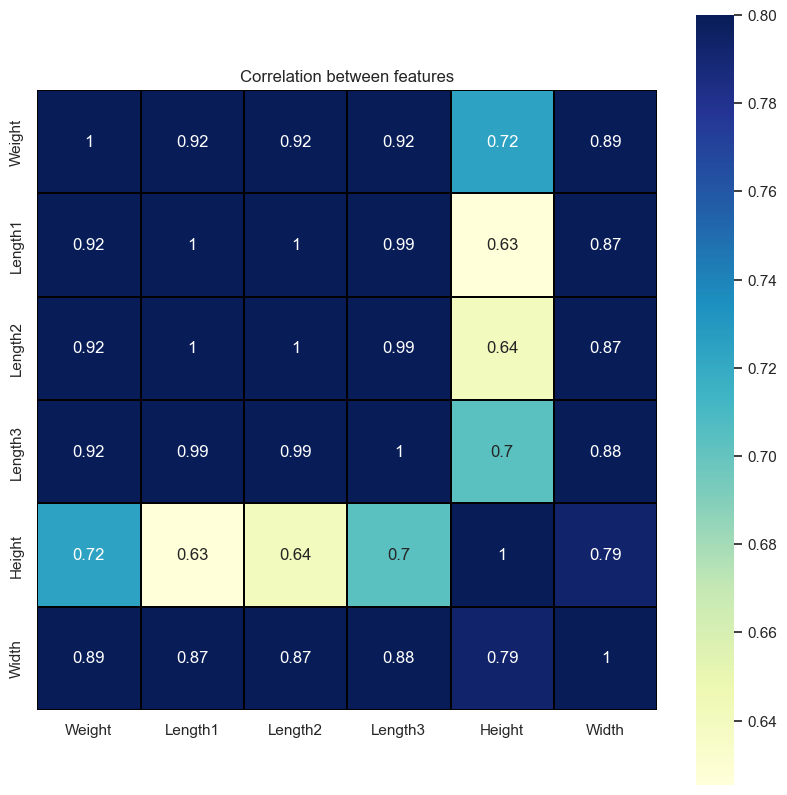

In [131]:
corr=fish.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=.8, linewidth= 0.01, square= True, annot= True, cmap='YlGnBu',linecolor='black')
plt.title('Correlation between features')

<AxesSubplot:>

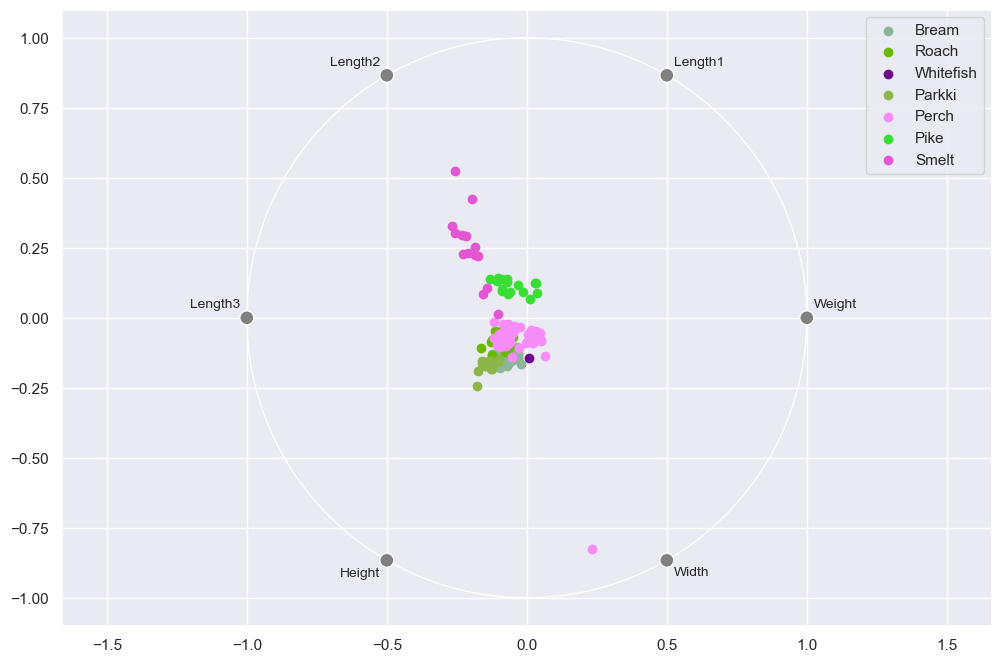

In [139]:
from pandas.plotting import radviz
radviz(fish, "Species")

<AxesSubplot:>

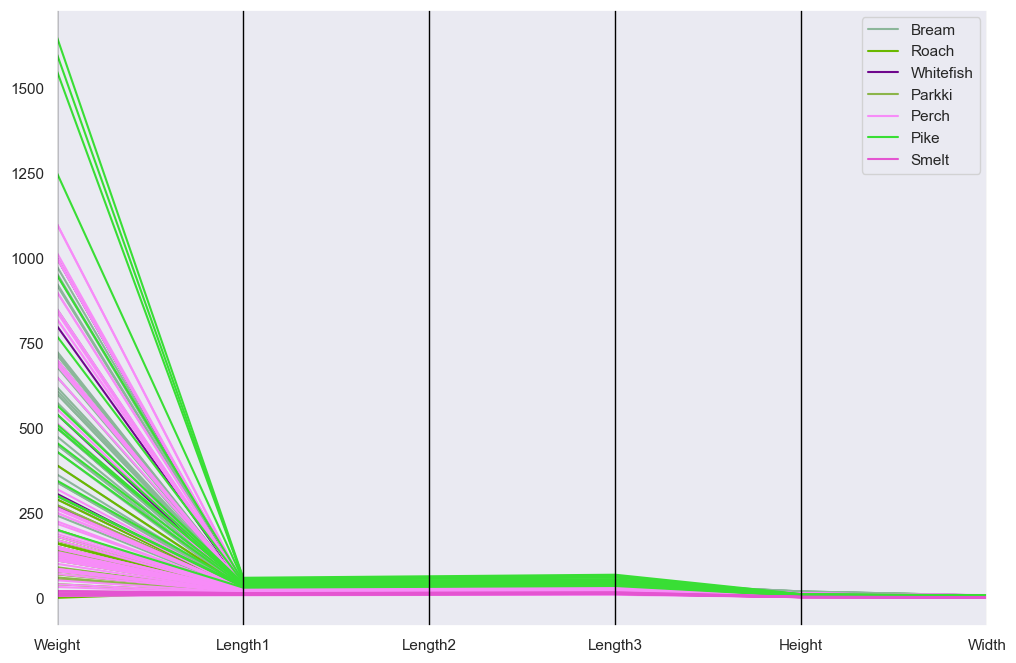

In [143]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(fish, "Species")

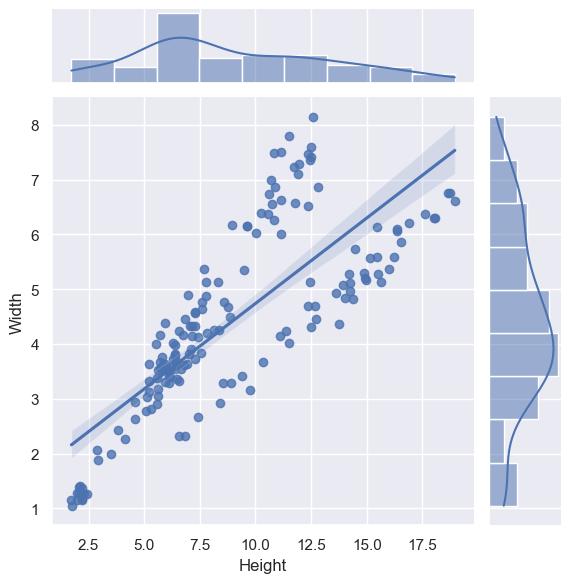

In [144]:
JG1 = sns.jointplot("Height", "Width", data=fish, kind='reg')

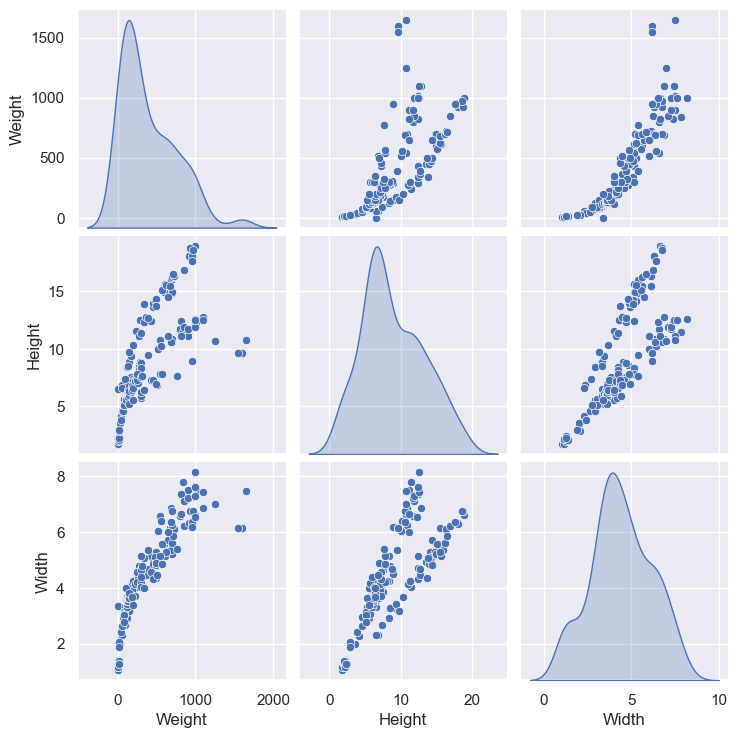

In [145]:
sns.pairplot(data=fish[['Weight', 'Height', 'Width', 'Species']], size=2.5, diag_kind='kde')

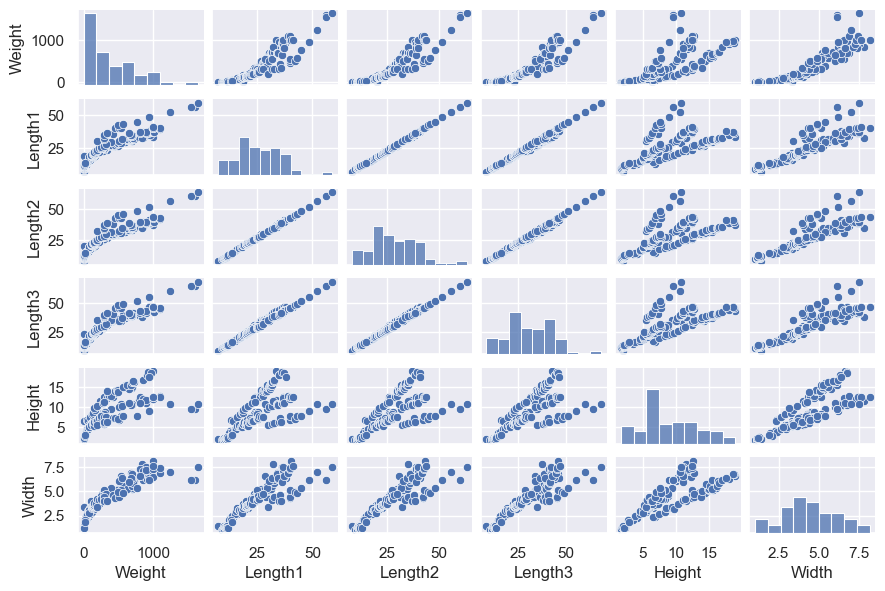

In [146]:
sns.pairplot(fish, size = 1, aspect = 1.5)

Text(0.5, 1.0, 'Species according Weight')

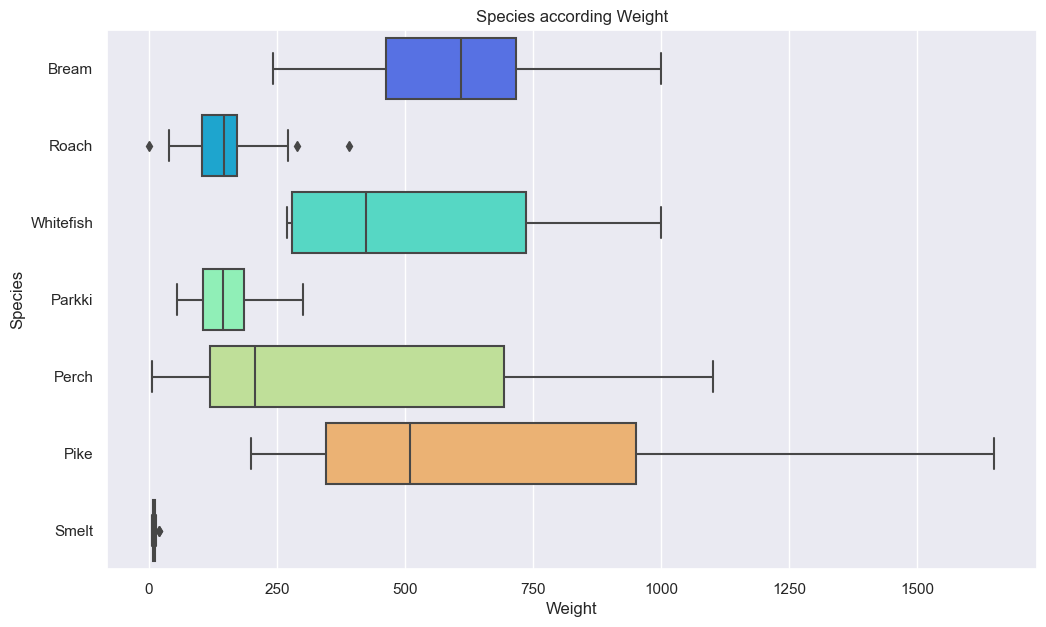

In [147]:
plt.figure(figsize=(12,7))
sns.boxplot(data=fish, x='Weight', y='Species', palette='rainbow')

plt.title('Species according Weight')

Data Preprocessing

In [148]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
fish['Species'] = label_encoder.fit_transform(fish['Species'])

In [149]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


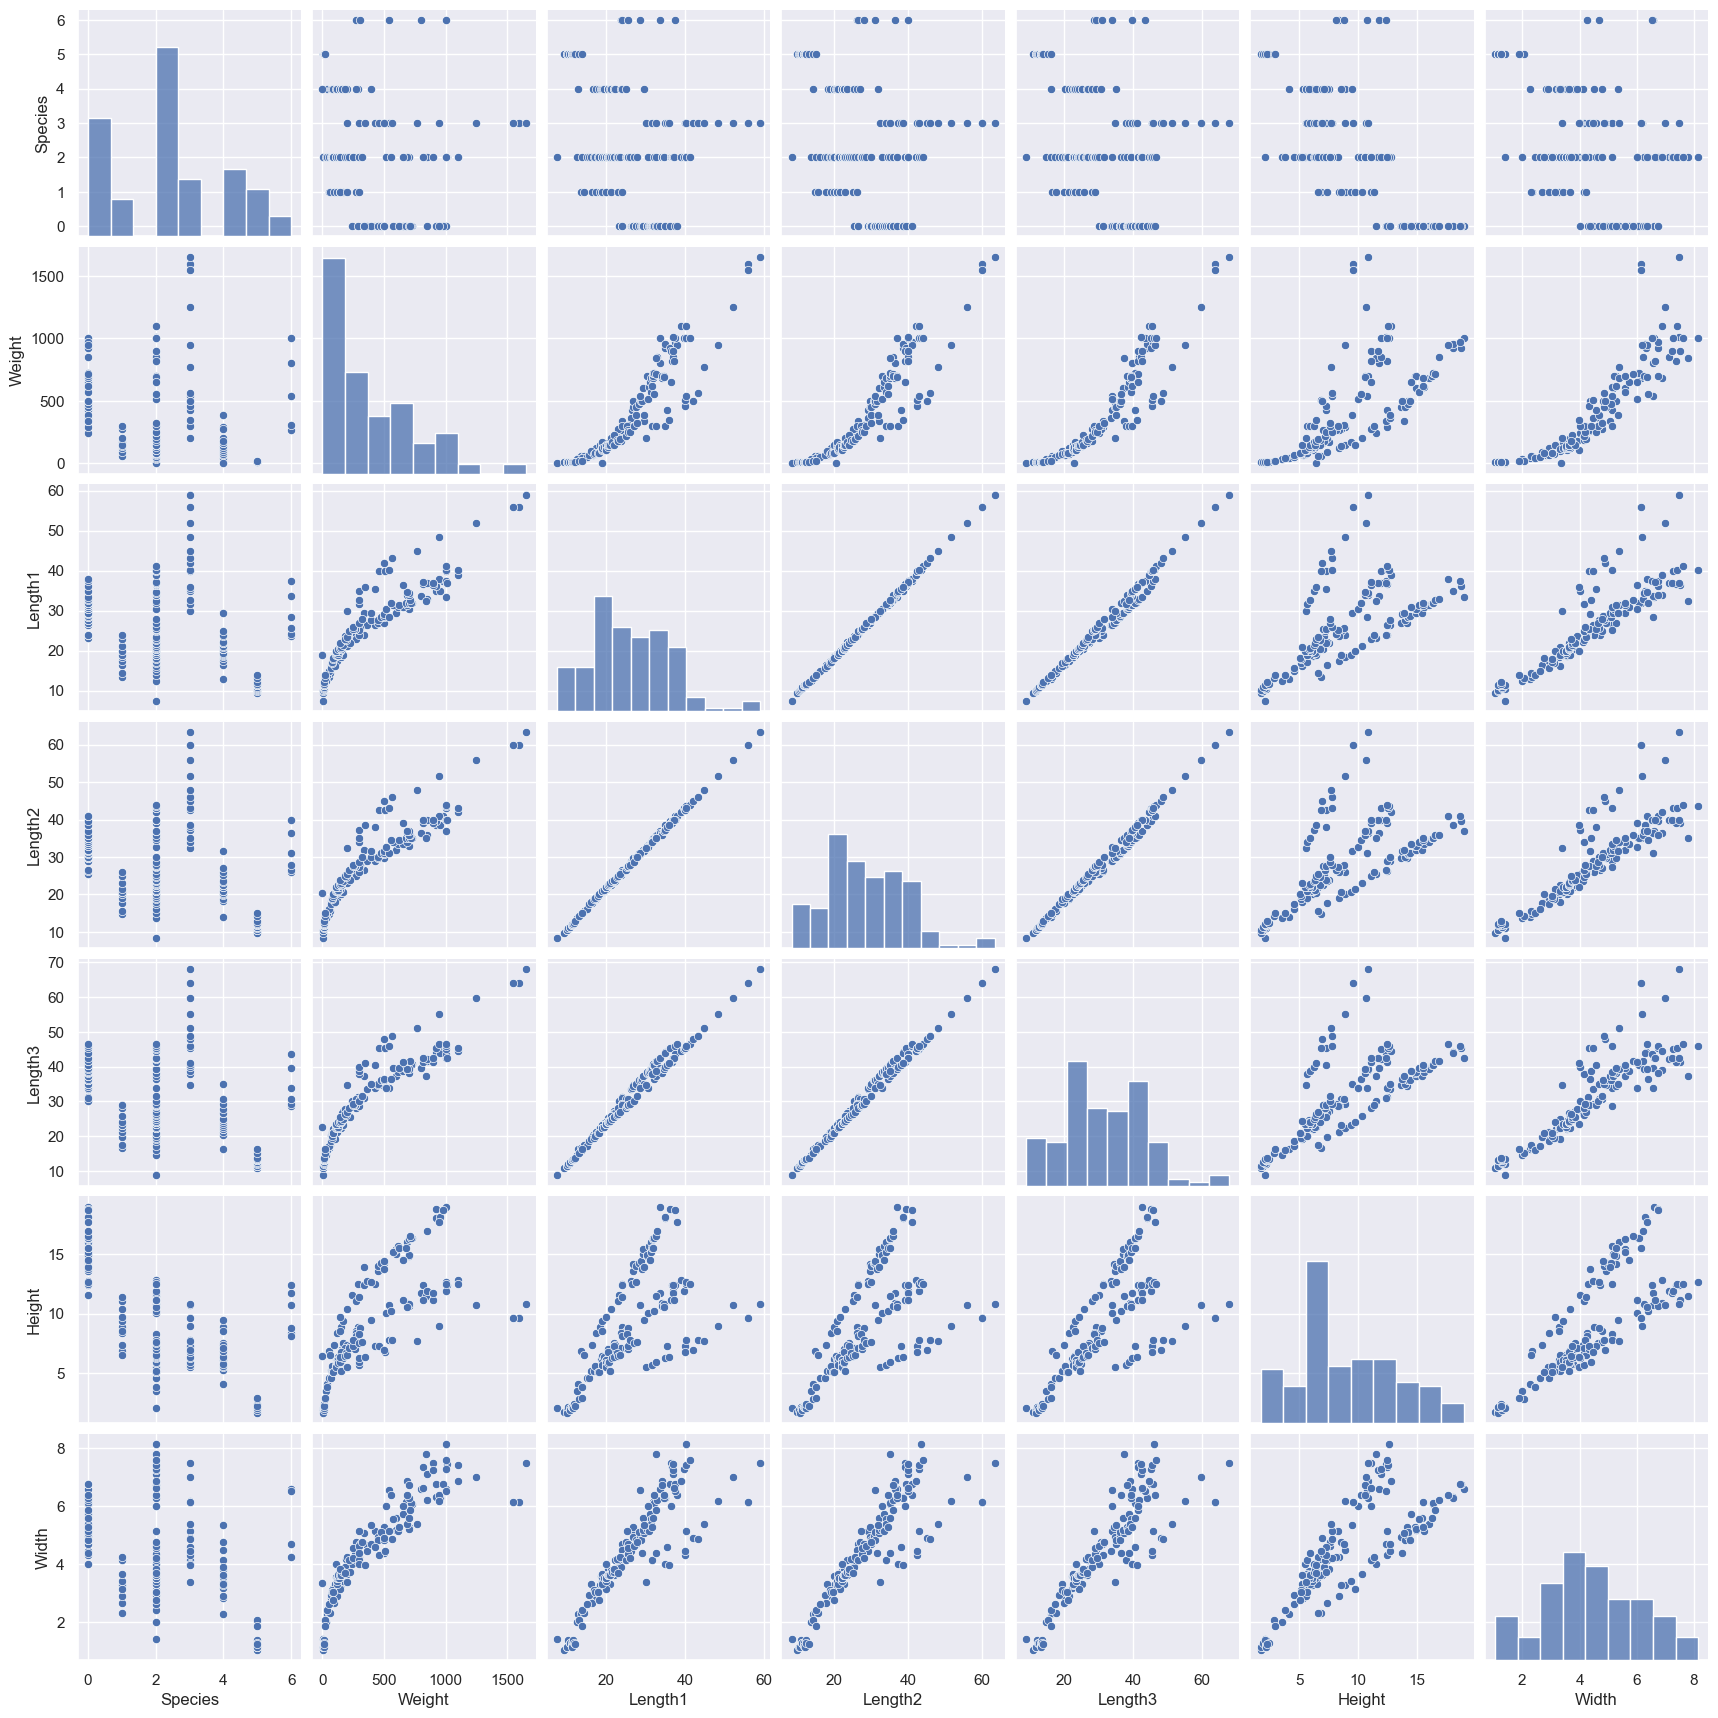

In [150]:
sns.pairplot(fish)
plt.show()

In [151]:
fish.corr()

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Preparing X and y

In [152]:
X=fish.drop('Species',axis=1)

In [153]:
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [154]:
X.tail()

,Weight,Length1,Length2,Length3,Height,Width
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672
158,19.9,13.8,15.0,16.2,2.9322,1.8792


In [155]:
y=fish['Species']

In [156]:
y

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int32

Splitting X and y into training and test datasets

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [158]:
X_train

,Weight,Length1,Length2,Length3,Height,Width
68,145.0,19.8,21.5,24.1,9.7364,3.1571
102,300.0,25.2,27.3,28.7,8.3230,5.1373
29,1000.0,33.5,37.0,42.6,18.9570,6.6030
151,10.0,11.3,11.8,13.1,2.2139,1.2838
133,345.0,36.0,38.5,41.0,6.3960,3.9770
...,...,...,...,...,...,...
96,225.0,22.0,24.0,25.5,7.2930,3.7230
27,714.0,32.7,36.0,41.5,16.5170,5.8515
23,680.0,31.8,35.0,40.6,15.4686,6.1306
139,770.0,44.8,48.0,51.2,7.6800,5.3760


In [159]:
X_test

,Weight,Length1,Length2,Length3,Height,Width
150,8.7,10.8,11.3,12.6,1.9782,1.2852
57,306.0,25.6,28.0,30.8,8.7780,4.6816
64,120.0,17.5,19.0,21.3,8.3922,2.9181
142,1600.0,56.0,60.0,64.0,9.6000,6.1440
19,650.0,31.0,33.5,38.7,14.4738,5.7276
119,850.0,36.9,40.0,42.3,11.9286,7.1064
122,820.0,37.1,40.0,42.5,11.1350,6.6300
128,200.0,30.0,32.3,34.8,5.5680,3.3756
113,700.0,34.0,36.0,38.3,10.6091,6.7408
41,110.0,19.1,20.8,23.1,6.1677,3.3957


In [160]:
y_train

68     1
102    2
29     0
151    5
133    3
      ..
96     2
27     0
23     0
139    3
98     2
Name: Species, Length: 111, dtype: int32

In [161]:
y_test

150    5
57     6
64     1
142    3
19     0
119    2
122    2
128    3
113    2
41     4
17     0
44     4
80     2
28     0
140    3
75     2
125    2
137    3
91     2
103    2
147    5
46     4
0      0
89     2
100    2
8      0
10     0
157    5
69     1
83     2
141    3
111    2
20     0
107    2
84     2
123    2
153    5
4      0
156    5
5      0
124    2
144    3
155    5
101    2
6      0
115    2
18     0
37     4
Name: Species, dtype: int32

# Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Using the model for prediction

In [163]:
model.intercept_

5.0358179348748955

In [164]:
train_pred = model.predict(X_train)
train_pred

array([ 0.49394575,  2.22173015, -0.67493156,  4.52040799,  2.4233423 ,
       -0.23606711,  4.02127642,  3.87962732, -0.61652442,  2.88515338,
        3.06579215,  2.32770399,  2.25523838,  2.94092762,  4.43707973,
        2.16012955,  2.54609801,  3.46448475,  3.24770438,  0.58192879,
        2.04624308,  2.29736925,  4.51598832,  3.30303894,  0.32222852,
        2.09432621,  1.81313151,  0.04324105,  1.47223251,  0.55463296,
        2.72852724,  1.13093983,  4.3429891 , -0.64843181,  2.30788869,
        1.04322436, -1.30824728,  2.63375415,  2.16150072,  1.30102548,
        0.66284342,  3.8278735 ,  2.57248435,  1.05521921,  2.77142117,
        4.40216973,  3.15971462,  1.30004517,  2.39788066,  0.34911448,
        2.66045538,  3.06518332,  2.6804859 ,  3.67177838,  2.49849965,
        3.44930048,  1.04510239,  4.09162748,  1.32697708,  3.24747627,
        0.68588142, -0.41495919,  4.49205246,  4.56846998,  3.51230921,
        4.54740771,  2.86612349, -0.10780569,  1.92061873,  2.10

In [165]:
test_pred = model.predict(X_test)
test_pred

array([ 4.72832676,  2.28971095,  1.28937076,  4.24146073,  1.60382828,
        2.06069582,  2.43895935,  2.62587922,  3.51853045,  3.09789387,
        1.06389413,  3.10206958,  2.51151352,  0.37366651,  3.50688886,
        3.02592371,  2.79910307,  2.88895343,  2.56283703,  2.15437925,
        4.57103709,  3.06010265,  1.25087318,  2.49802928,  2.45922876,
        0.7390153 ,  0.7127155 ,  3.79204625,  0.67749054,  2.25902586,
        3.28332486,  3.93482878,  0.77441592,  2.44804459,  2.81626037,
        2.09633786,  4.20388629,  2.03288804,  3.59065831,  0.6073867 ,
        2.28288553,  4.72182433,  3.96502629,  2.53693729,  0.5046671 ,
        2.71259056, -0.14635119,  3.53891684])

Checking Mean Squared Error

In [166]:
from sklearn.metrics import mean_squared_error
train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

In [167]:
print(train_RMSE)

1.0120011176692145


In [168]:
print(test_RMSE)

1.0178740817404042


In [169]:
model.score(X_train,y_train)

0.6490179657287652

checking CV Score

In [170]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=17)
print(scores)


cv_score = scores.mean()
print(cv_score)

[ 0.          0.          0.          0.77447392  0.         -8.43060352
  0.1783296  -7.48280844  0.          0.          0.          0.
  0.         -1.82920005  0.         -0.62163443  0.        ]
-1.0242025250166347


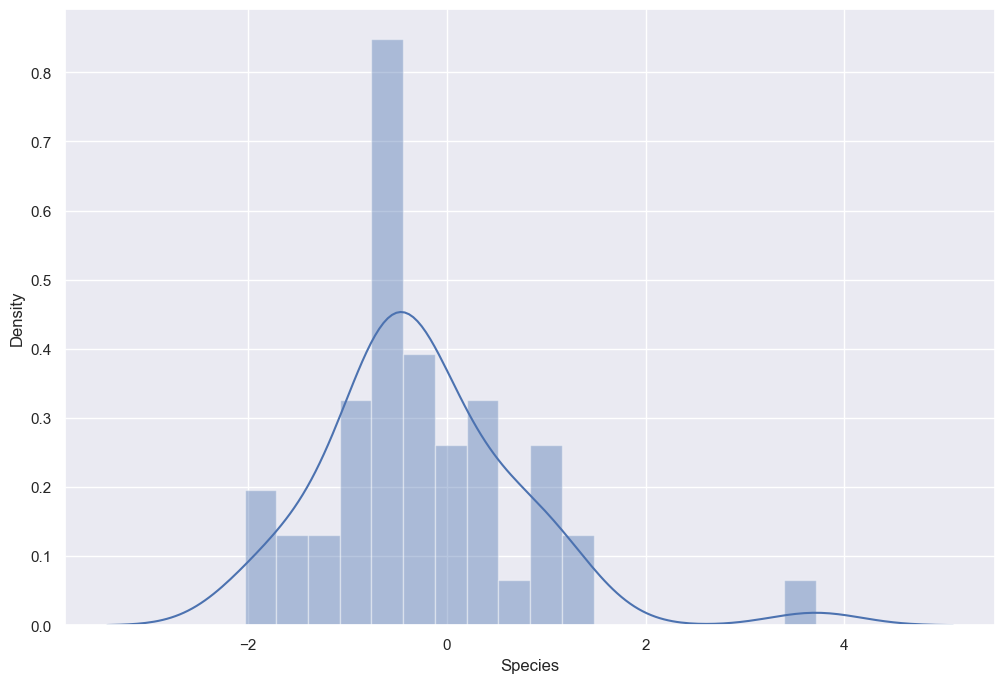

In [171]:
test_res = y_test- test_pred
sns.distplot(test_res,bins=18,kde=True)
plt.show()

# Logistic Regression in sci-kit learn

In [172]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [173]:
train_pred = model.predict(X_train)
train_pred

array([ 0.49394575,  2.22173015, -0.67493156,  4.52040799,  2.4233423 ,
       -0.23606711,  4.02127642,  3.87962732, -0.61652442,  2.88515338,
        3.06579215,  2.32770399,  2.25523838,  2.94092762,  4.43707973,
        2.16012955,  2.54609801,  3.46448475,  3.24770438,  0.58192879,
        2.04624308,  2.29736925,  4.51598832,  3.30303894,  0.32222852,
        2.09432621,  1.81313151,  0.04324105,  1.47223251,  0.55463296,
        2.72852724,  1.13093983,  4.3429891 , -0.64843181,  2.30788869,
        1.04322436, -1.30824728,  2.63375415,  2.16150072,  1.30102548,
        0.66284342,  3.8278735 ,  2.57248435,  1.05521921,  2.77142117,
        4.40216973,  3.15971462,  1.30004517,  2.39788066,  0.34911448,
        2.66045538,  3.06518332,  2.6804859 ,  3.67177838,  2.49849965,
        3.44930048,  1.04510239,  4.09162748,  1.32697708,  3.24747627,
        0.68588142, -0.41495919,  4.49205246,  4.56846998,  3.51230921,
        4.54740771,  2.86612349, -0.10780569,  1.92061873,  2.10

In [174]:
test_pred = model.predict(X_train)
test_pred

array([ 0.49394575,  2.22173015, -0.67493156,  4.52040799,  2.4233423 ,
       -0.23606711,  4.02127642,  3.87962732, -0.61652442,  2.88515338,
        3.06579215,  2.32770399,  2.25523838,  2.94092762,  4.43707973,
        2.16012955,  2.54609801,  3.46448475,  3.24770438,  0.58192879,
        2.04624308,  2.29736925,  4.51598832,  3.30303894,  0.32222852,
        2.09432621,  1.81313151,  0.04324105,  1.47223251,  0.55463296,
        2.72852724,  1.13093983,  4.3429891 , -0.64843181,  2.30788869,
        1.04322436, -1.30824728,  2.63375415,  2.16150072,  1.30102548,
        0.66284342,  3.8278735 ,  2.57248435,  1.05521921,  2.77142117,
        4.40216973,  3.15971462,  1.30004517,  2.39788066,  0.34911448,
        2.66045538,  3.06518332,  2.6804859 ,  3.67177838,  2.49849965,
        3.44930048,  1.04510239,  4.09162748,  1.32697708,  3.24747627,
        0.68588142, -0.41495919,  4.49205246,  4.56846998,  3.51230921,
        4.54740771,  2.86612349, -0.10780569,  1.92061873,  2.10

Check the score of the model using train and test

In [175]:
log_model.score(X_train,y_train)

0.8288288288288288

In [176]:
log_model.score(X_test,y_test)

0.8958333333333334

Checking CV score

In [177]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_model,X,y,cv=17)
score
score.mean()

0.7679738562091504

# KNN

In [178]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [179]:
knn_pred_train = knn_model.predict(X_train)

In [180]:
knn_pred_train

array([1, 0, 2, 5, 0, 0, 2, 0, 0, 2, 2, 6, 6, 2, 5, 2, 2, 2, 2, 0, 1, 3,
       5, 2, 0, 2, 1, 0, 2, 0, 2, 0, 5, 0, 2, 0, 0, 0, 2, 1, 6, 5, 0, 1,
       2, 5, 2, 0, 4, 0, 2, 2, 3, 5, 3, 2, 4, 2, 0, 2, 0, 0, 5, 5, 2, 3,
       0, 0, 2, 6, 2, 2, 4, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 4, 4, 2, 2, 0, 3, 0, 5, 0, 4, 0, 6, 2, 0, 0, 0,
       2])

In [181]:
knn_pred_test = knn_model.predict(X_test)

In [182]:
knn_pred_test

array([5, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 5, 2,
       2, 2, 2, 0, 0, 5, 2, 2, 2, 2, 0, 0, 2, 2, 5, 0, 5, 0, 2, 2, 5, 2,
       0, 0, 0, 2])

In [183]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,knn_pred_train))

0.6666666666666666


In [184]:
print(accuracy_score(y_test,knn_pred_test))

0.6041666666666666


Checking CV Score

In [185]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(knn_model,X,y,cv=17)
scores
scores.mean()

0.5137254901960784

KNN using GridSearchCV

In [186]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,31)),'p':[1,2]}

cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 1, 'p': 1}

Fit the Model

In [187]:
knn_model = KNeighborsClassifier(n_neighbors=1,p=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

Prefdict Test and train

In [188]:
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

Model evaluation using accuracy score

In [189]:
print(accuracy_score(y_test,knn_pred_test))

0.6041666666666666


In [190]:
print(accuracy_score(y_train,knn_pred_train))

1.0


CV Score using KNN

In [191]:
scores = cross_val_score(knn_model,X,y,cv=17)
scores.mean()

0.5915032679738563

# Support Vector Machine

In [192]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [193]:
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

Checking the Accuracy Score

In [194]:
print(accuracy_score(y_train,svm_pred_train))

0.44144144144144143


In [195]:
print(accuracy_score(y_test,svm_pred_test))

0.4583333333333333


CV Score

In [196]:
scores= cross_val_score(svm_model,X,y,cv=17)
scores.mean()

0.45751633986928103

SVM using Hyper Parameter

In [197]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()

param_grid = {'C':[0.01,0.1,10,100],'kernel':['linear','rbf','sigmoid','poly']}
grid =  GridSearchCV(estimator,param_grid,cv=17)
grid.fit(X,y)

GridSearchCV(cv=17, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [198]:
grid.best_params_

{'C': 100, 'kernel': 'linear'}

Rebuild the Model Using SVM

In [199]:
svm_model = SVC(kernel= 'linear',C=100)
svm_model.fit(X_train,y_train)

SVC(C=100, kernel='linear')

Prediction Using Train and Test

In [200]:
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

Checking Accuracy Score

In [201]:
print(accuracy_score(y_train,svm_pred_train))

1.0


In [202]:
print(accuracy_score(y_test,svm_pred_test))

0.9791666666666666


Checking CV Score

In [203]:
scores = cross_val_score(svm_model,X,y,cv=17)
scores.mean()

0.9575163398692811

# Decision Tree

In [204]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

Prediction using Train and Test

In [205]:
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)

Accuracy Score Using Train and Test

In [206]:
print(accuracy_score(y_train,dt_pred_train))

1.0


In [207]:
print(accuracy_score(y_test,dt_pred_test))

0.7083333333333334


Checking CV Score

In [208]:
scores = cross_val_score(dt_model,X,y,cv=17)
scores
scores.mean()

0.7032679738562092

[Text(0.6325, 0.9615384615384616, 'Height <= 12.637\ngini = 0.792\nsamples = 111\nvalue = [24, 9, 38, 11, 16, 8, 5]'),
 Text(0.5925, 0.8846153846153846, 'Width <= 1.401\ngini = 0.748\nsamples = 89\nvalue = [2, 9, 38, 11, 16, 8, 5]'),
 Text(0.5525, 0.8076923076923077, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 0, 0, 7, 0]'),
 Text(0.6325, 0.8076923076923077, 'Length3 <= 37.15\ngini = 0.713\nsamples = 82\nvalue = [2, 9, 38, 11, 16, 1, 5]'),
 Text(0.465, 0.7307692307692307, 'Height <= 8.352\ngini = 0.669\nsamples = 60\nvalue = [2, 9, 29, 0, 16, 1, 3]'),
 Text(0.25, 0.6538461538461539, 'Width <= 2.723\ngini = 0.551\nsamples = 45\nvalue = [0, 3, 27, 0, 13, 1, 1]'),
 Text(0.17, 0.5769230769230769, 'Length3 <= 16.1\ngini = 0.688\nsamples = 8\nvalue = [0, 3, 3, 0, 1, 1, 0]'),
 Text(0.13, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0, 0]'),
 Text(0.21, 0.5, 'Height <= 5.362\ngini = 0.56\nsamples = 5\nvalue = [0, 3, 0, 0, 1, 1, 0]'),
 Text(0.17, 0.4230769230769231, 'Length1 <= 13.35\

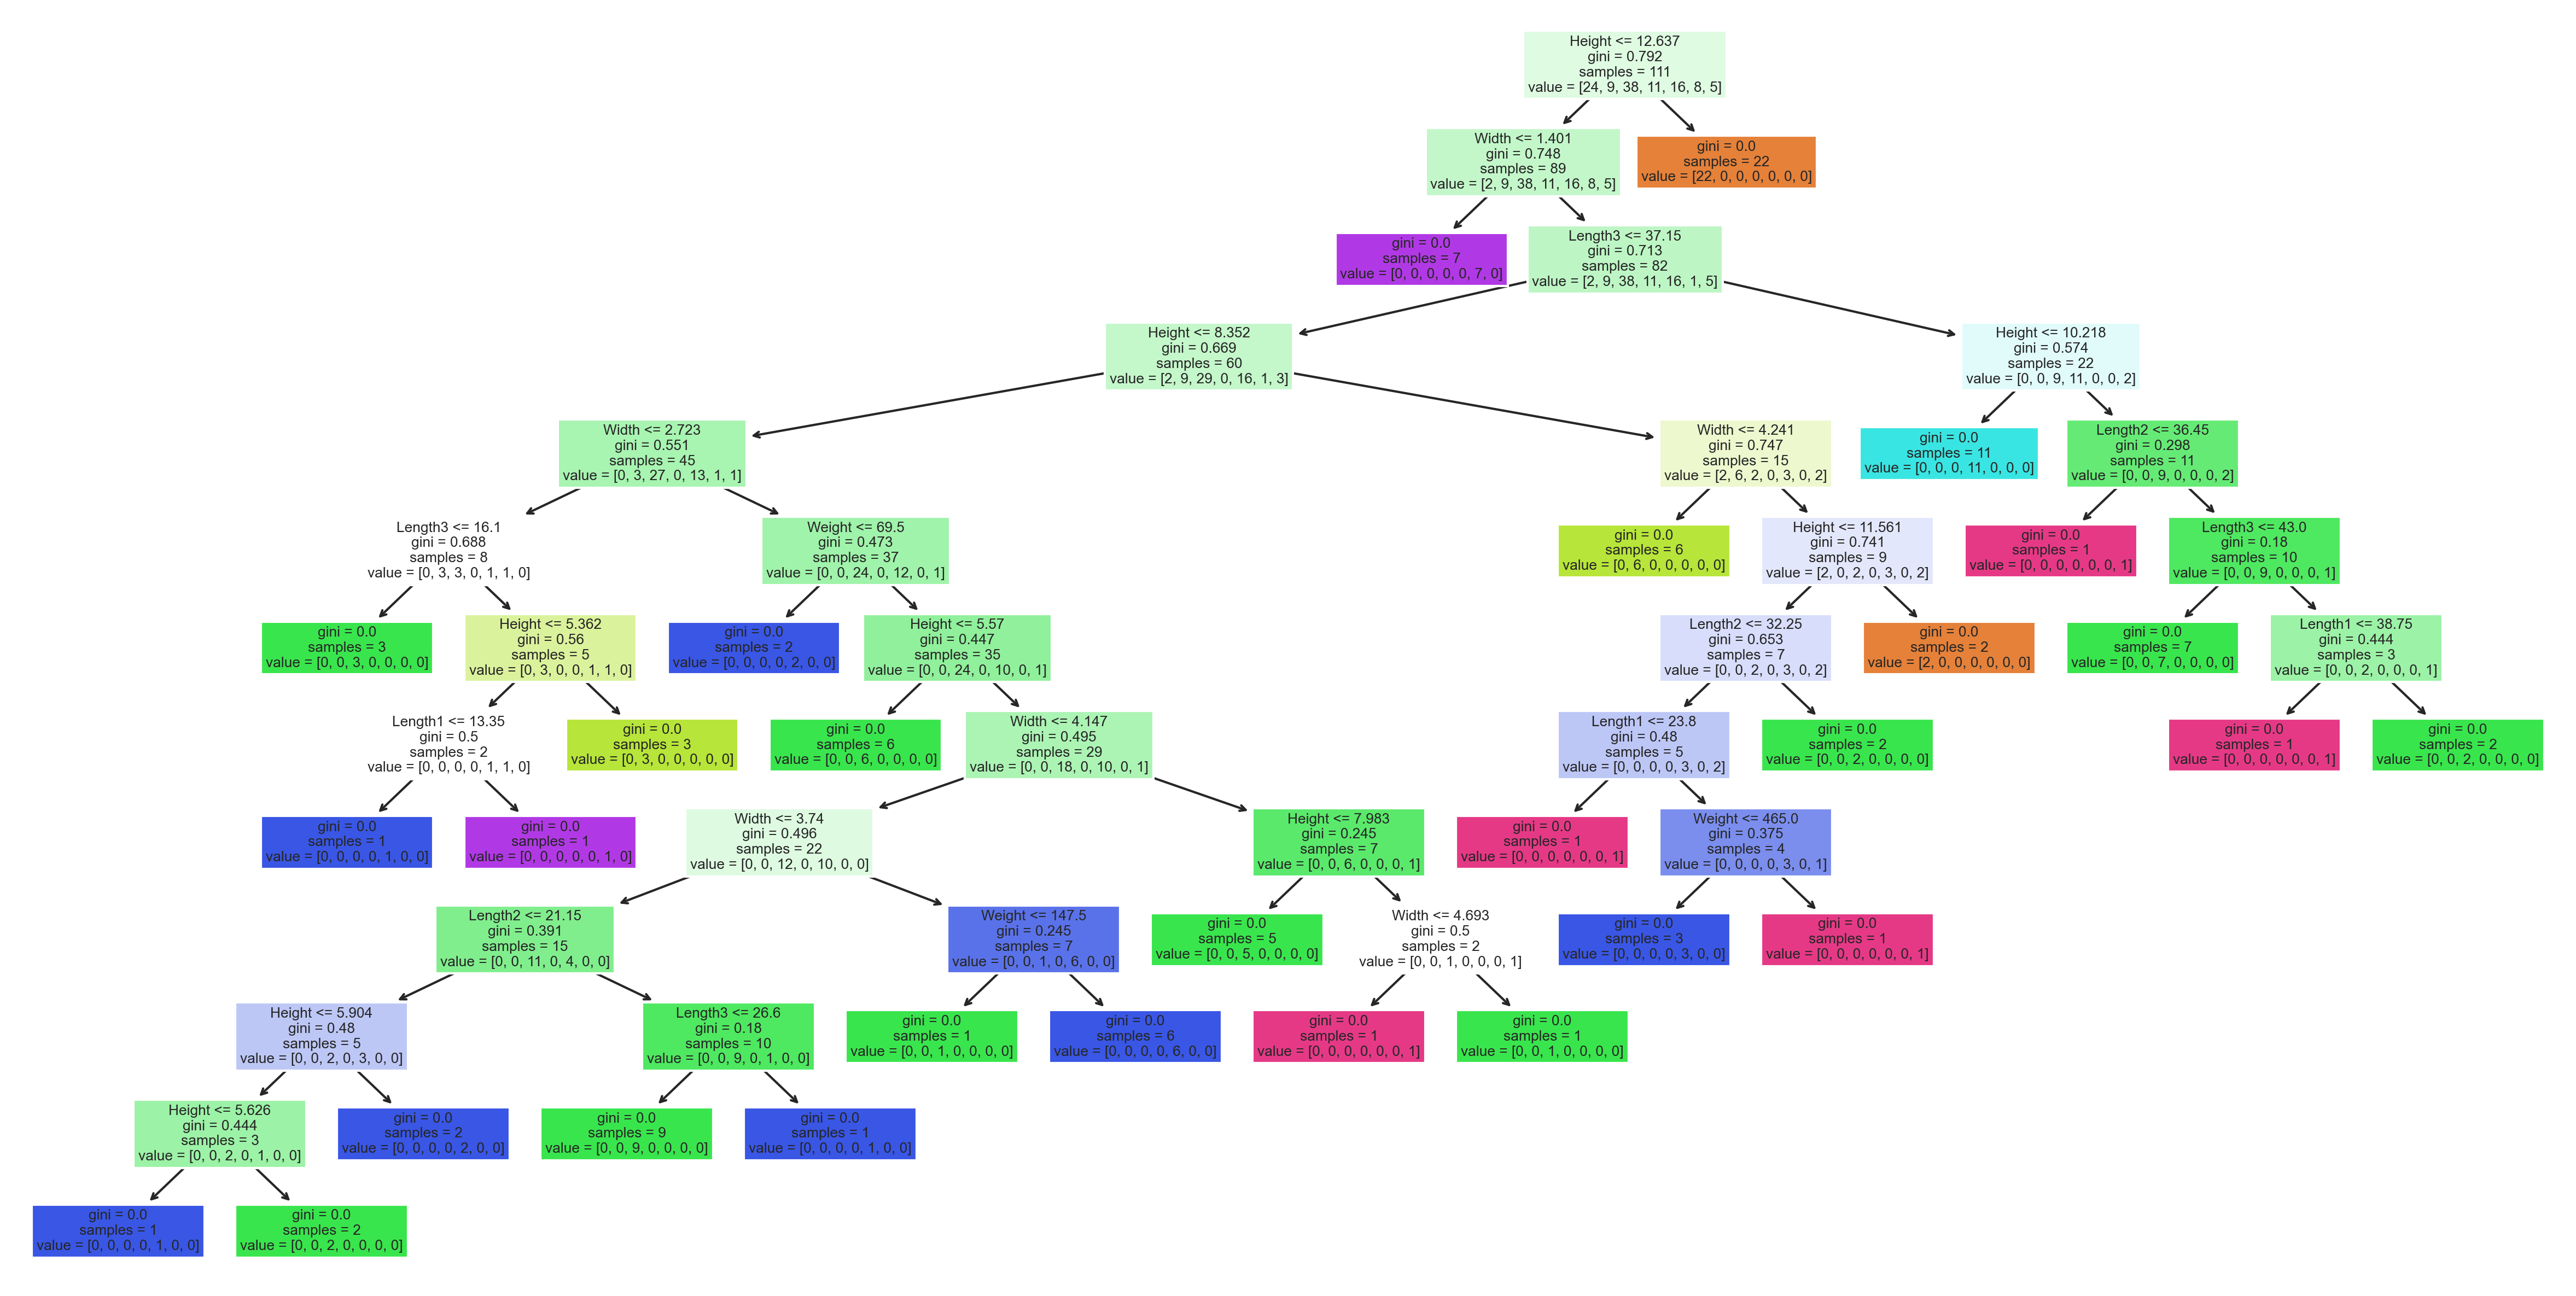

In [209]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10),dpi=300)
plot_tree(dt_model,filled=True,feature_names=X.columns)

In [210]:
pd.DataFrame(index=X.columns,data=dt_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Weight,0.057704
Length1,0.036795
Length2,0.060437
Length3,0.121037
Height,0.490571
Width,0.233456


Decision Tree Using Hyper Parameter

In [211]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4]}
grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=17)
grid.fit(X_train,y_train)

GridSearchCV(cv=17, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4]},
             scoring='accuracy')

In [212]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

Rebuild a Model According to hyper parameter

In [213]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [214]:
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)

Accuracy Score using Test and Train

In [215]:
print(accuracy_score(y_test,dt_pred_test))

0.7291666666666666


In [216]:
print(accuracy_score(y_train,dt_pred_train))

0.7747747747747747


Checking CV Score

In [217]:
scores= cross_val_score(dt_model,X,y,cv=17)
scores.mean()

0.757516339869281